In [490]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

Based on our hyphothesis assumption, and decide to analysis the impact of population, marrage status, lone-parent family, income level, low-income rate and especially low-income for children, education level. we filtered the 2016 Toronto census data by neighbourhood and the variables we are analysising. 


 Data cleaning:
    filter out unnecessary variables from original csv file. then import the csv file to VS code for analysis
    with Python 
        removed outlier (city of toronto)
        converted datatypes
        add new columns' lowincomerate'
        slicing and subsetting rows and columns
        aggregated data by creating new DataFrame
        joined two DataFrame
        
        



In [491]:
#import our data
df = pd.read_csv(r"C:\Users\mei88\OneDrive\桌面\MMAI-5000N AI\group project\neighbourhood-profiles-2016-140-model_modified.csv")

In [492]:
# check info, only one non-null , which is the neighbourhood number of city of Toronto , which is suppose to be.
# we are removing cit of Toronto as it is a total. 
# but the datatype are wronog, we need convert them 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 41 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Characteristic                                                       141 non-null    object 
 1   Neighbourhood Number                                                 140 non-null    float64
 2   Population, 2016                                                     141 non-null    object 
 3   Population, 2011                                                     141 non-null    object 
 4   Population Change 2011-2016                                          141 non-null    object 
 5    Average household size                                              141 non-null    float64
 6     Married or living common law                                       141 non-null    object 
 7     Not ma

In [493]:
# remove 'city of Toronto' since it is a total number, it will be a outlier
df =  df.drop(0)

In [494]:
df.describe(include='all')


,Characteristic,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Average household size,Married or living common law,Not married and not living common law,Total lone-parent families,"Under $5,000",...,Unemployment rate,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,Master's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Earned doctorate
count,140,140.0000,140,140,140,140.000000,140,140,140,140,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
unique,140,NaN,140,139,92,NaN,136,134,111,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Agincourt North,NaN,"29,113","9,632",1.30%,NaN,6690,5480,885,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1,2,5,NaN,2,2,4,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,70.5000,NaN,NaN,NaN,2.491643,NaN,NaN,NaN,NaN,...,8.303571,2694.892857,4007.607143,2585.892857,464.214286,3819.000000,1372.107143,389.714286,168.392857,216.964286
std,NaN,40.5586,NaN,NaN,NaN,0.395183,NaN,NaN,NaN,NaN,...,1.896510,1880.902840,2281.240076,1455.787417,269.464077,3046.742287,1219.807018,291.602353,194.123438,204.648933
min,NaN,1.0000,NaN,NaN,NaN,1.540000,NaN,NaN,NaN,NaN,...,4.500000,460.000000,1190.000000,510.000000,125.000000,445.000000,65.000000,75.000000,10.000000,0.000000
25%,NaN,35.7500,NaN,NaN,NaN,2.240000,NaN,NaN,NaN,NaN,...,6.900000,1423.750000,2372.500000,1598.750000,260.000000,2053.750000,660.000000,217.500000,55.000000,83.750000
50%,NaN,70.5000,NaN,NaN,NaN,2.525000,NaN,NaN,NaN,NaN,...,8.200000,2157.500000,3330.000000,2105.000000,417.500000,3257.500000,1097.500000,315.000000,107.500000,162.500000
75%,NaN,105.2500,NaN,NaN,NaN,2.702500,NaN,NaN,NaN,NaN,...,9.625000,3457.500000,5197.500000,3112.500000,571.250000,4385.000000,1637.500000,457.500000,215.000000,300.000000


In [495]:
# change 'Characteristic' datatype as str
df['Characteristic']=df['Characteristic'].astype(str)

In [496]:
#change datatype as str from float
df['Neighbourhood Number'] = df['Neighbourhood Number'].astype(int).astype(str)


In [497]:
#remove the coma from the value cells and conver the data type as int
df['Population, 2016'] = df['Population, 2016'].str.replace(',', '').astype(int)


In [498]:
#remove the coma from the value cells and conver the data type as int
df['Population, 2011'] = df['Population, 2011'].str.replace(',', '').astype(int)

In [499]:
# change datatype  as float  from object
df['Population Change 2011-2016'] = df['Population Change 2011-2016'].str.replace('[^0-9.-]', '', regex=True).astype(float) / 100


In [500]:
df['Total_Low_income status in 2015 in household'] = df['Total_Low_income status in 2015 in household'].str.replace(',', '').astype(int)

df['Total_Low_income status in 2015 in household'] = df['Total_Low_income status in 2015 in household'].astype(int)


In [501]:
# add a column lowincomerate = mean of ' lowincome_18 to 64 years (%)' and ' lowincome_ 0 to 5 years (%)'"assignment 1_version2.ipynb"
df['lowincomerate'] = (df['  lowincome_18 to 64 years (%)'] + df['   lowincome_ 0 to 5 years (%)']) / 2


In [502]:
print(df.columns)

Index(['Characteristic', 'Neighbourhood Number', 'Population, 2016',
       'Population, 2011', 'Population Change 2011-2016',
       ' Average household size', '  Married or living common law',
       '  Not married and not living common law',
       '  Total lone-parent families ', '  Under $5,000', '  $5,000 to $9,999',
       '  $10,000 to $14,999', '  $20,000 to $24,999', '  $25,000 to $29,999',
       '  $30,000 to $34,999', '  $35,000 to $39,999', '  $40,000 to $44,999',
       '  $45,000 to $49,999', '  $50,000 to $59,999', '  $60,000 to $69,999',
       '  $70,000 to $79,999', '  $80,000 to $89,999', '  $90,000 to $99,999',
       '  $100,000 and over', '    $200,000 and over',
       '  lowincome_18 to 64 years (%)', '   lowincome_ 0 to 5 years (%)',
       'Total_Low_income status in 2015 in household', '  housing_Owner',
       '  housing_Renter', 'Employment rate', 'Unemployment rate',
       '    No certificate, diploma or degree',
       '   Secondary (high) school diplo

In [503]:
df

,Characteristic,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Average household size,Married or living common law,Not married and not living common law,Total lone-parent families,"Under $5,000",...,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,Master's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Earned doctorate,lowincomerate
1,Agincourt North,129,29113,30279,-0.039,3.16,14200,11075,1655,155,...,6550,7460,3540,775,4380,890,295,125,115,25.75
2,Agincourt South-Malvern West,128,23757,21988,0.080,2.88,11205,9475,1365,315,...,4035,6090,3150,655,4210,1020,280,150,110,26.20
3,Alderwood,20,12054,11904,0.013,2.60,5735,4550,665,55,...,2005,2960,2095,230,1660,430,125,35,35,8.35
4,Annex,95,30526,29177,0.046,1.80,12275,15890,895,850,...,1585,4270,2700,615,9135,4795,960,460,1210,17.55
5,Banbury-Don Mills,42,27695,26918,0.029,2.23,13240,10850,1245,265,...,2295,5150,3490,795,6500,2575,800,625,375,15.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Wychwood,94,14349,13986,0.026,2.24,5840,6655,750,120,...,1860,2285,1710,330,2770,1310,315,80,295,14.35
137,Yonge-Eglinton,100,11817,10578,0.117,2.08,5380,4630,425,205,...,575,1430,1275,235,3625,1780,370,155,330,11.75
138,Yonge-St.Clair,97,12528,11652,0.075,1.76,5705,5605,390,215,...,460,1820,1410,360,3720,2100,445,225,290,13.50
139,York University Heights,27,27593,27713,-0.004,2.71,10420,13120,2075,345,...,5125,6980,3765,765,3910,1030,340,105,185,30.65


In [504]:
df.describe(include='all')

,Characteristic,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Average household size,Married or living common law,Not married and not living common law,Total lone-parent families,"Under $5,000",...,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,Master's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Earned doctorate,lowincomerate
count,140,140,140.000000,140.000000,140.000000,140.000000,140,140,140,140,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
unique,140,140,NaN,NaN,NaN,NaN,136,134,111,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Agincourt North,129,NaN,NaN,NaN,NaN,6690,5480,885,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,2,2,4,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,19511.221429,18679.000000,0.040407,2.491643,NaN,NaN,NaN,NaN,...,2694.892857,4007.607143,2585.892857,464.214286,3819.000000,1372.107143,389.714286,168.392857,216.964286,21.222500
std,NaN,NaN,10033.589222,9100.831576,0.089031,0.395183,NaN,NaN,NaN,NaN,...,1880.902840,2281.240076,1455.787417,269.464077,3046.742287,1219.807018,291.602353,194.123438,204.648933,9.651472
min,NaN,NaN,6577.000000,6488.000000,-0.076000,1.540000,NaN,NaN,NaN,NaN,...,460.000000,1190.000000,510.000000,125.000000,445.000000,65.000000,75.000000,10.000000,0.000000,4.500000
25%,NaN,NaN,12019.500000,11853.750000,-0.003250,2.240000,NaN,NaN,NaN,NaN,...,1423.750000,2372.500000,1598.750000,260.000000,2053.750000,660.000000,217.500000,55.000000,83.750000,13.612500
50%,NaN,NaN,16749.500000,16364.500000,0.015000,2.525000,NaN,NaN,NaN,NaN,...,2157.500000,3330.000000,2105.000000,417.500000,3257.500000,1097.500000,315.000000,107.500000,162.500000,19.850000
75%,NaN,NaN,23854.500000,22407.500000,0.042500,2.702500,NaN,NaN,NaN,NaN,...,3457.500000,5197.500000,3112.500000,571.250000,4385.000000,1637.500000,457.500000,215.000000,300.000000,27.512500


we are analysing by comparing  the top 10 shooting neighbourhoods and the last 10 shooting neighbourd's characteristics:

THE TOP 10 NEIGHBOURHOODS ARE :
 Glenfield-Jane Heights (25)
Black Creek (24)
Mount Olive-Silverstone-Jamestown (2)
Malvern (132)
Waterfront Communities-The Island (77)
Woburn (137)
Downsview-Roding-CFB (26)
West Humber-Clairville (1)
York University Heights (27)
Yorkdale-Glen Park (31)


THE LAST 10 NEIGHBOURHOODS ARE :

Leaside-Bennington (56)
Yonge-Eglinton (100)
Forest Hill North (102)
Yonge-St.Clair (97)
Casa Loma (96)
Willowdale West (37)
Mount Pleasant East (99)
Kingsway South (15)
Lawrence Park North (105)
Forest Hill South (101)


In [505]:
top10 = ['25', '24', '132', '2', '77', '137', '26', '1', '27', '31']
df_top10 = df[df['Neighbourhood Number'].isin(top10)].reset_index(drop=True)


In [506]:
df_top10

,Characteristic,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Average household size,Married or living common law,Not married and not living common law,Total lone-parent families,"Under $5,000",...,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,Master's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Earned doctorate,lowincomerate
0,Black Creek,24,21737,22057,-0.015,2.94,7025,10110,2370,140,...,6420,5195,2360,340,1235,145,90,55,55,38.90
1,Downsview-Roding-CFB,26,35052,34659,0.011,2.67,14540,14770,2775,200,...,8590,8365,5015,810,3350,590,360,110,90,23.50
2,Glenfield-Jane Heights,25,30491,31390,-0.029,3.04,10485,14210,3340,90,...,9560,7190,3650,500,1610,320,160,15,10,32.95
3,Malvern,132,43794,45086,-0.029,3.26,18350,17565,3145,195,...,7345,11575,6915,935,5465,1105,385,160,110,25.20
4,Mount Olive-Silverstone-Jamestown,2,32954,32788,0.005,3.32,12905,12955,2535,150,...,7895,7785,3845,555,3015,1000,270,110,60,33.30
5,Waterfront Communities-The Island,77,65913,43361,0.520,1.61,26455,35820,1690,"1,795",...,1900,8340,7470,1450,27280,10130,2360,890,1100,16.95
6,West Humber-Clairville,1,33312,34100,-0.023,3.20,14540,13730,1965,215,...,5905,8510,5025,800,4245,1260,410,180,95,20.35
7,Woburn,137,53485,53350,0.003,2.87,23035,20800,3455,435,...,8850,13170,7535,1120,7575,2135,705,270,195,32.10
8,York University Heights,27,27593,27713,-0.004,2.71,10420,13120,2075,345,...,5125,6980,3765,765,3910,1030,340,105,185,30.65
9,Yorkdale-Glen Park,31,14804,14687,0.008,2.62,6235,6610,1005,100,...,3445,3385,1755,320,1595,430,220,60,95,19.80


In [507]:
last10 = ['56', '100', '102', '97', '96', '37', '99', '15', '105', '101']
df_last10 = df[df['Neighbourhood Number'].isin(last10)].reset_index(drop=True)

In [508]:
df_last10

,Characteristic,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Average household size,Married or living common law,Not married and not living common law,Total lone-parent families,"Under $5,000",...,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,Master's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Earned doctorate,lowincomerate
0,Casa Loma,96,10968,10487,0.046,2.00,5275,4485,315,165,...,490,1690,1165,170,3315,1590,365,305,330,12.75
1,Forest Hill North,102,12806,12474,0.027,2.33,5645,5100,575,120,...,880,2190,1440,435,3015,1190,455,380,275,15.00
2,Forest Hill South,101,10732,10926,-0.018,2.14,5135,4235,305,125,...,690,1605,980,290,2900,1565,415,415,280,10.85
3,Kingsway South,15,9271,9170,0.011,2.56,4900,2790,270,45,...,545,1290,975,155,2605,1235,280,110,210,4.50
4,Lawrence Park North,105,14607,14541,0.005,2.69,7225,4100,495,80,...,870,1745,1135,265,4140,1855,415,215,365,5.35
5,Leaside-Bennington,56,16828,17011,-0.011,2.59,8050,5505,605,120,...,1125,2350,1680,325,4665,1940,465,200,390,6.90
6,Mount Pleasant East,99,16775,15982,0.050,2.25,7865,5920,615,155,...,1015,2280,1865,325,4720,2160,505,220,375,7.60
7,Willowdale West,37,16936,15004,0.129,2.22,8000,7140,640,560,...,1405,3140,1935,455,4700,1770,410,260,360,22.75
8,Yonge-Eglinton,100,11817,10578,0.117,2.08,5380,4630,425,205,...,575,1430,1275,235,3625,1780,370,155,330,11.75
9,Yonge-St.Clair,97,12528,11652,0.075,1.76,5705,5605,390,215,...,460,1820,1410,360,3720,2100,445,225,290,13.50


In [509]:
joined_df = pd.concat([df_top10, df_last10], ignore_index=True)


checking the 'unemployment rate' impact to the shooting neighbourhoods. 
    -neighbourhood 77 is the 3rd of top shooting neighbourhood, but has the lowest unemployment rate. 
    -neighbourhood 37 is the 5th of last shooting neighbourhood . however, its unemployment rate is high. 
we can draw conclusion that unemployment rate is significantly related with shootting. 

<Axes: xlabel='Unemployment rate', ylabel='Neighbourhood Number'>

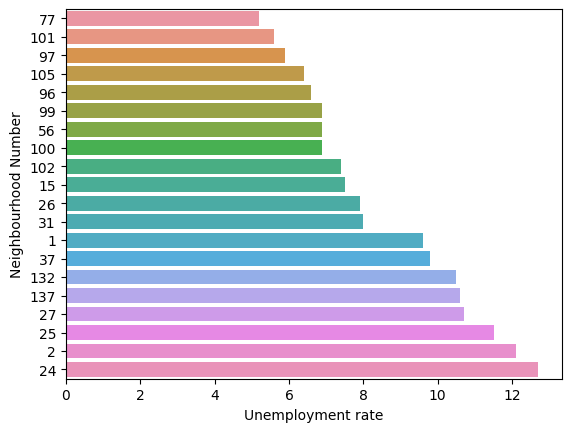

In [510]:
# checking the 'unemployment rate' impact to the shooting neighbourhoods. 

sorted_df = joined_df.sort_values('Unemployment rate')
sns.barplot(x='Unemployment rate', y='Neighbourhood Number', data=sorted_df)


checking low income factor
the top 10 neighbourhood with the most gunshooting all have high lowincome population counts.
however, last 10 neighbourhood with least gunshooting have low lowincome population counts. 

<Axes: xlabel='Total_Low_income status in 2015 in household', ylabel='Neighbourhood Number'>

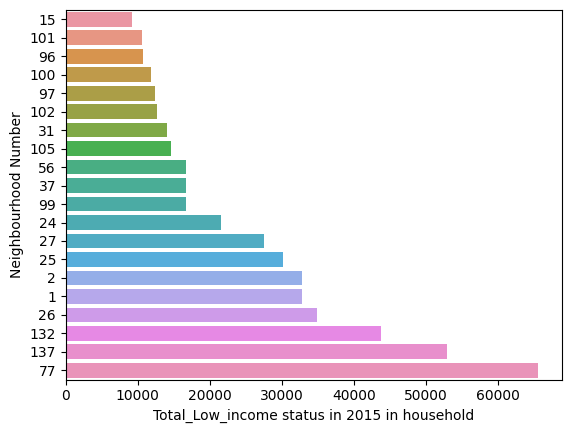

In [511]:
# checking low income factor
sorted_df_lowincome = joined_df.sort_values('Total_Low_income status in 2015 in household')
sns.barplot(x='Total_Low_income status in 2015 in household', y='Neighbourhood Number', data=sorted_df_lowincome)

In [516]:
df.columns

Index(['Characteristic', 'Neighbourhood Number', 'Population, 2016',
       'Population, 2011', 'Population Change 2011-2016',
       ' Average household size', '  Married or living common law',
       '  Not married and not living common law',
       '  Total lone-parent families ', '  Under $5,000', '  $5,000 to $9,999',
       '  $10,000 to $14,999', '  $20,000 to $24,999', '  $25,000 to $29,999',
       '  $30,000 to $34,999', '  $35,000 to $39,999', '  $40,000 to $44,999',
       '  $45,000 to $49,999', '  $50,000 to $59,999', '  $60,000 to $69,999',
       '  $70,000 to $79,999', '  $80,000 to $89,999', '  $90,000 to $99,999',
       '  $100,000 and over', '    $200,000 and over',
       '  lowincome_18 to 64 years (%)', '   lowincome_ 0 to 5 years (%)',
       'Total_Low_income status in 2015 in household', '  housing_Owner',
       '  housing_Renter', 'Employment rate', 'Unemployment rate',
       '    No certificate, diploma or degree',
       '   Secondary (high) school diplo

by checking the low income rate, the higher the low income rate, the more shooting incidents. we can draw conclusion, there are relationships between shooting incidents and low income 


<Axes: xlabel='lowincomerate', ylabel='Neighbourhood Number'>

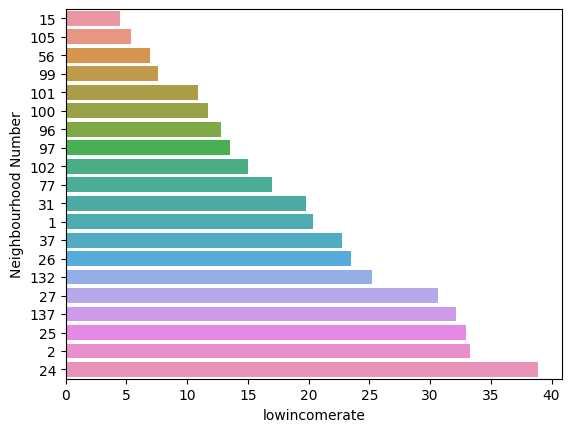

In [518]:
# checking the lowincome rate in neighbourhood population
sorted_df_lowincomerate = joined_df.sort_values('lowincomerate')
sns.barplot(x='lowincomerate', y='Neighbourhood Number', data=sorted_df_lowincomerate)